### `---------------Mandatory Information to fill------------`

### Group ID: Group 150
### Group Members Name with Student ID:
1. HEMANT KUMAR PARAKH (2023AA05741)
2. SUSHIL KUMAR (2023aa05849)
3. NAGINENI SATISH BABU (2023aa05585)
4. JITENDRA KUMAR (2023aa05198)


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Background

In digital advertising, Click-Through Rate (CTR) is a critical metric that measures the effectiveness of an advertisement. It is calculated as the ratio of users who click on an ad to the number of users who view the ad. A higher CTR indicates more successful engagement with the audience, which can lead to increased conversions and revenue. From time-to-time advertisers experiment with various elements/targeting of an ad to optimise the ROI.

# Scenario

Imagine an innovative digital advertising agency, AdMasters Inc., that specializes in maximizing click-through rates (CTR) for their clients' advertisements. One of their clients has identified four key tunable elements in their ads: *Age*, *City*, *Gender*, and *Mobile Operating System (OS)*. These elements significantly influence user engagement and conversion rates. The client is keen to optimize their CTR while minimizing resource expenditure.

# Objective

Optimize the CTR of digital ads by employing Multi Arm Bandit algorithms. System should dynamically and efficiently allocate ad displays to maximize overall CTR.


# Dataset

The dataset for Ads contains 4 unique features/characteristics.
*   Age (Range: 25:50)
*   City (Possible Values: &#39;New York&#39;, &#39;Los Angeles&#39;, &#39;Chicago&#39;,&#39;Houston&#39;, &#39;Phoenix&#39;)
*   Gender (Possible Values: &#39;Male&#39;, &#39;Female&#39;)
*   OS: (Possible Values: &#39;iOS&#39;, &#39;Android&#39;, &#39;Other&#39;)

***Link for accessing dataset:***
https://drive.google.com/file/d/1Y5HmEeoQsafo9Diy9piS69qEMnC0g1ys/view?usp=sharing


# Environment Details

**Arms:** Each arm represents a different ad from the dataset.

**Reward Function:**
* Probability of a Male clicking on an Ad -> 0.7 (randomly generated)
* Probability of a Female clicking on an Ad -> 0.6 (randomly generated)
* Once probabilities are assigned to all the values, create a final reward (clicked or not clicked binary outcome) based on the assumed probabilities in step 1 (by combining the probabilities of each feature value present in that ad)

**Assumptions**
* Assume alpha = beta = 1 for cold start
* Explore Percentage = 10%
* Run the simulation for min 1000 iterations


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install python-math

In [ ]:
# Constants
epsilon = 0.1  # Default exploration percentage for epsilon-greedy
num_iterations = 1000  # Number of iterations to run for each policy
alpha = 1  # Parameter for initialization in UCB algorithm



# Load Dataset

In [ ]:
# Code for Dataset loading and print dataset statistics
#-----write your code below this line---------
import pandas as pd

file_path = '/content/sample_data/AD_Click.csv'
df = pd.read_csv(file_path)

# Print dataset statistics
print("Dataset Statistics:")
print(df.describe())

Dataset Statistics:
              Age
count  780.000000
mean    37.500000
std      7.504812
min     25.000000
25%     31.000000
50%     37.500000
75%     44.000000
max     50.000000


# Design a CTR Environment (1M)

In [ ]:
# Code for Dataset loading and print dataset statistics along with reward function
#-----write your code below this line---------
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Example code for creating CTR environment class
# Define CTR Environment class
class CTREnvironment:
    def __init__(self, dataset):
        self.dataset = dataset
        self.total_ads = len(dataset)
        self.iterations = 0
        self.action_counts = np.zeros(len(dataset))

    # Reward function - simulates a click reward for an ad based on its
    # index and the given action, using predefined click probabilities.
    def get_reward(self, ad_index, action):
        # Example reward function (replace with your actual reward logic)
        ad = self.dataset.iloc[ad_index]
        if action == 'Male':
            click_prob = 0.7  # Example click probability for Male
        elif action == 'Female':
            click_prob = 0.6  # Example click probability for Female
        else:
            click_prob = 0.5  # Default click probability for other actions

        # Simulate click based on click probability
        if random.random() < click_prob:
            return 1  # Clicked
        else:
            return 0  # Not clicked


    # The run function simulates a multi-armed bandit problem over num_iterations,
    # selecting actions based on a given policy, collecting rewards, and tracking
    # average rewards over time. It prints details of each iteration and returns
    # the list of average rewards.
    def run(self, policy, num_iterations, epsilon=epsilon):
        rewards = []
        avg_rewards = []
        for _ in range(num_iterations):
            ad_index = random.randint(0, self.total_ads - 1)
            action = policy(self, ad_index)
            self.action_counts[ad_index] += 1
            reward = self.get_reward(ad_index, action)
            rewards.append(reward)
            self.iterations += 1
            avg_reward = np.mean(rewards)
            avg_rewards.append(avg_reward)
            # Print current iteration details
            print(f"Iteration {self.iterations}: Policy={policy.__name__},
                  Ad={ad_index}, Action={action}, Reward={reward}")
        return avg_rewards

# usage:
if __name__ == "__main__":
    # Initialize environment with the dataset
    env = CTREnvironment(df)

    print(df.describe())
    # usage of reward function
    ad_index = random.randint(0, len(env.dataset) - 1)
    action = 'Male'  # action
    reward = env.get_reward(ad_index, action)
    print(f"\nReward for Ad {ad_index} with action '{action}': {reward}")



              Age
count  100.000000
mean    37.080000
std      7.934937
min     25.000000
25%     30.000000
50%     37.000000
75%     44.000000
max     50.000000

Reward for Ad 10 with action 'Male': 1


# Using Random Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a random policy
#-----write your code below this line---------
# Random policy
def random_policy(env, ad_index):
    return random.choice(['Male', 'Female'])

# Run each policy and store rewards
random_rewards = env.run(random_policy, num_iterations)

Iteration 1: Policy=random_policy, Ad=46, Action=Female, Reward=1
Iteration 2: Policy=random_policy, Ad=72, Action=Female, Reward=0
Iteration 3: Policy=random_policy, Ad=98, Action=Female, Reward=1
Iteration 4: Policy=random_policy, Ad=89, Action=Male, Reward=0
Iteration 5: Policy=random_policy, Ad=73, Action=Male, Reward=0
Iteration 6: Policy=random_policy, Ad=2, Action=Female, Reward=1
Iteration 7: Policy=random_policy, Ad=37, Action=Female, Reward=0
Iteration 8: Policy=random_policy, Ad=46, Action=Female, Reward=0
Iteration 9: Policy=random_policy, Ad=57, Action=Male, Reward=0
Iteration 10: Policy=random_policy, Ad=41, Action=Male, Reward=0
Iteration 11: Policy=random_policy, Ad=18, Action=Female, Reward=1
Iteration 12: Policy=random_policy, Ad=2, Action=Female, Reward=0
Iteration 13: Policy=random_policy, Ad=32, Action=Male, Reward=0
Iteration 14: Policy=random_policy, Ad=36, Action=Female, Reward=1
Iteration 15: Policy=random_policy, Ad=71, Action=Male, Reward=1
Iteration 16: Poli

# Using Greedy Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a greedy policy
#-----write your code below this line---------
# Initialize variables for Greedy policy
def greedy_policy(env, ad_index):
    if env.action_counts[ad_index] == 0:
        return random.choice(['Male', 'Female'])
    else:
        return 'Male' if env.get_reward(ad_index, 'Male') >= env.get_reward(ad_index, 'Female') else 'Female'

env.iterations = 0  # Reset iterations for clear comparison
env.action_counts = np.zeros(len(df))
greedy_avg_rewards = env.run(greedy_policy, num_iterations)


Iteration 1: Policy=greedy_policy, Ad=44, Action=Female, Reward=1
Iteration 2: Policy=greedy_policy, Ad=88, Action=Female, Reward=0
Iteration 3: Policy=greedy_policy, Ad=91, Action=Male, Reward=0
Iteration 4: Policy=greedy_policy, Ad=2, Action=Male, Reward=0
Iteration 5: Policy=greedy_policy, Ad=6, Action=Male, Reward=1
Iteration 6: Policy=greedy_policy, Ad=81, Action=Male, Reward=1
Iteration 7: Policy=greedy_policy, Ad=17, Action=Female, Reward=1
Iteration 8: Policy=greedy_policy, Ad=92, Action=Female, Reward=0
Iteration 9: Policy=greedy_policy, Ad=80, Action=Female, Reward=0
Iteration 10: Policy=greedy_policy, Ad=99, Action=Female, Reward=1
Iteration 11: Policy=greedy_policy, Ad=70, Action=Female, Reward=0
Iteration 12: Policy=greedy_policy, Ad=64, Action=Male, Reward=1
Iteration 13: Policy=greedy_policy, Ad=8, Action=Male, Reward=0
Iteration 14: Policy=greedy_policy, Ad=89, Action=Female, Reward=0
Iteration 15: Policy=greedy_policy, Ad=43, Action=Female, Reward=0
Iteration 16: Polic

# Using Epsilon-Greedy Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a epsilon-greedy policy
#-----write your code below this line---------
import numpy as np
# Initialize variables for Epsilon-Greedy policy
def epsilon_greedy_policy(env, ad_index, epsilon=0.1):
    if random.random() < epsilon:
        return random.choice(['Male', 'Female'])
    else:
        return 'Male' if env.get_reward(ad_index, 'Male') >= env.get_reward(ad_index, 'Female') else 'Female'

env.iterations = 0  # Reset iterations for clear comparison
env.action_counts = np.zeros(len(df))
epsilon_greedy_avg_rewards = env.run(epsilon_greedy_policy, num_iterations)

Iteration 1: Policy=epsilon_greedy_policy, Ad=83, Action=Male, Reward=0
Iteration 2: Policy=epsilon_greedy_policy, Ad=45, Action=Male, Reward=0
Iteration 3: Policy=epsilon_greedy_policy, Ad=8, Action=Male, Reward=1
Iteration 4: Policy=epsilon_greedy_policy, Ad=71, Action=Male, Reward=1
Iteration 5: Policy=epsilon_greedy_policy, Ad=80, Action=Female, Reward=1
Iteration 6: Policy=epsilon_greedy_policy, Ad=37, Action=Female, Reward=1
Iteration 7: Policy=epsilon_greedy_policy, Ad=82, Action=Male, Reward=1
Iteration 8: Policy=epsilon_greedy_policy, Ad=91, Action=Male, Reward=0
Iteration 9: Policy=epsilon_greedy_policy, Ad=87, Action=Male, Reward=1
Iteration 10: Policy=epsilon_greedy_policy, Ad=90, Action=Male, Reward=1
Iteration 11: Policy=epsilon_greedy_policy, Ad=89, Action=Male, Reward=0
Iteration 12: Policy=epsilon_greedy_policy, Ad=53, Action=Male, Reward=1
Iteration 13: Policy=epsilon_greedy_policy, Ad=55, Action=Male, Reward=0
Iteration 14: Policy=epsilon_greedy_policy, Ad=66, Action

# Using UCB (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a UCB
#-----write your code below this line---------
# The ucb_policy function selects the action ('Male' or 'Female') with the
# highest Upper Confidence Bound (UCB) value
# for a given ad index, balancing exploration and exploitation.
def ucb_policy(env, ad_index):
    ucb_values = []
    total_counts = np.sum(env.action_counts)
    for action in ['Male', 'Female']:
        if env.action_counts[ad_index] == 0:
            ucb_value = float('inf')
        else:
            exploit_term = env.get_reward(ad_index, action) / env.action_counts[ad_index]
            explore_term = np.sqrt((2 * np.log(total_counts)) / env.action_counts[ad_index])
            ucb_value = exploit_term + explore_term
        ucb_values.append(ucb_value)
    return 'Male' if ucb_values[0] >= ucb_values[1] else 'Female'


env.iterations = 0  # Reset iterations for clear comparison
env.action_counts = np.zeros(len(df))
ucb_avg_rewards = env.run(ucb_policy, num_iterations)


Iteration 1: Policy=ucb_policy, Ad=86, Action=Male, Reward=1
Iteration 2: Policy=ucb_policy, Ad=61, Action=Male, Reward=1
Iteration 3: Policy=ucb_policy, Ad=73, Action=Male, Reward=1
Iteration 4: Policy=ucb_policy, Ad=33, Action=Male, Reward=0
Iteration 5: Policy=ucb_policy, Ad=77, Action=Male, Reward=1
Iteration 6: Policy=ucb_policy, Ad=49, Action=Male, Reward=1
Iteration 7: Policy=ucb_policy, Ad=61, Action=Male, Reward=1
Iteration 8: Policy=ucb_policy, Ad=62, Action=Male, Reward=0
Iteration 9: Policy=ucb_policy, Ad=72, Action=Male, Reward=0
Iteration 10: Policy=ucb_policy, Ad=24, Action=Male, Reward=0
Iteration 11: Policy=ucb_policy, Ad=47, Action=Male, Reward=1
Iteration 12: Policy=ucb_policy, Ad=72, Action=Female, Reward=1
Iteration 13: Policy=ucb_policy, Ad=27, Action=Male, Reward=1
Iteration 14: Policy=ucb_policy, Ad=18, Action=Male, Reward=0
Iteration 15: Policy=ucb_policy, Ad=22, Action=Male, Reward=1
Iteration 16: Policy=ucb_policy, Ad=50, Action=Male, Reward=1
Iteration 17: P

# Plot CTR distribution for all the appraoches as a spearate graph (0.5M)

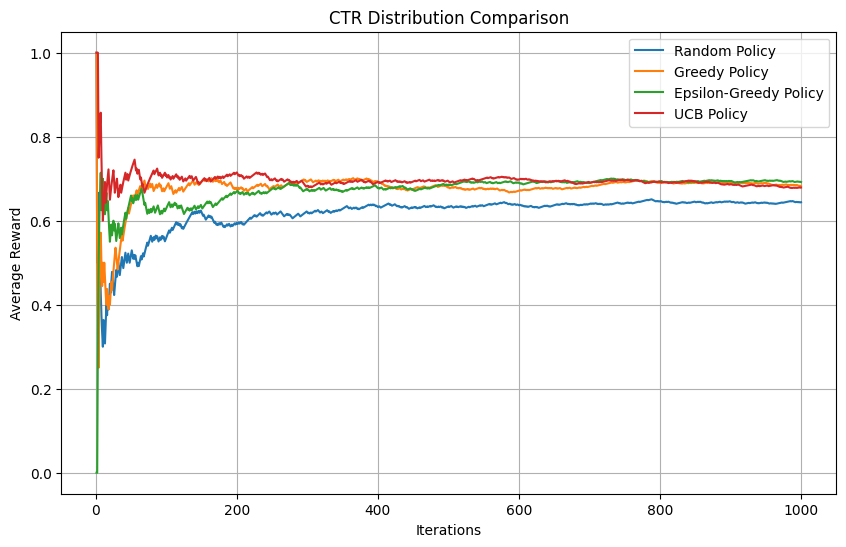

In [ ]:
#-----write your code below this line---------
import matplotlib.pyplot as plt

# Plotting CTR distributions in one graph (line plot for average rewards)
plt.figure(figsize=(10, 6))

# Random Policy
plt.plot(range(1, num_iterations + 1), random_rewards, label='Random Policy')

# Greedy Policy
plt.plot(range(1, num_iterations + 1), greedy_avg_rewards, label='Greedy Policy')

# Epsilon-Greedy Policy
plt.plot(range(1, num_iterations + 1), epsilon_greedy_avg_rewards, label='Epsilon-Greedy Policy')

# UCB Policy
plt.plot(range(1, num_iterations + 1), ucb_avg_rewards, label='UCB Policy')

plt.title('CTR Distribution Comparison')
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.legend()
plt.grid(True)
plt.show()


# Changing Exploration Percentage (1M)
* How does changing the exploration percentage (EXPLORE_PERCENTAGE) affect the performance of the algorithm? Test with different values (e.g. 0.15 and 0.2) and discuss the results.


In [ ]:
#Implement with any MAB algorithm
#Try with different EXPLORE_PERCENTAGE
#Different value of alpha

# Test with different exploration percentages and alpha values
explore_percentages = [0.1, 0.15, 0.2]
alphas = [0.1, 0.2, 0.3]

for explore_percentage in explore_percentages:
    for alpha in alphas:
        print(f"\nExploration Percentage: {explore_percentage}, Alpha: {alpha}")
        env.alpha = alpha
        avg_rewards = env.run(epsilon_greedy_policy, num_iterations=1000, epsilon=explore_percentage)
        print("Average Rewards:", avg_rewards[-10:])  # Print last 10 average rewards

Streaming output truncated to the last 5000 lines.
Iteration 8014: Policy=epsilon_greedy_policy, Ad=35, Action=Male, Reward=0
Iteration 8015: Policy=epsilon_greedy_policy, Ad=12, Action=Male, Reward=1
Iteration 8016: Policy=epsilon_greedy_policy, Ad=5, Action=Male, Reward=1
Iteration 8017: Policy=epsilon_greedy_policy, Ad=31, Action=Male, Reward=0
Iteration 8018: Policy=epsilon_greedy_policy, Ad=15, Action=Male, Reward=1
Iteration 8019: Policy=epsilon_greedy_policy, Ad=65, Action=Male, Reward=1
Iteration 8020: Policy=epsilon_greedy_policy, Ad=7, Action=Female, Reward=0
Iteration 8021: Policy=epsilon_greedy_policy, Ad=27, Action=Male, Reward=1
Iteration 8022: Policy=epsilon_greedy_policy, Ad=85, Action=Male, Reward=1
Iteration 8023: Policy=epsilon_greedy_policy, Ad=34, Action=Male, Reward=1
Iteration 8024: Policy=epsilon_greedy_policy, Ad=83, Action=Female, Reward=1
Iteration 8025: Policy=epsilon_greedy_policy, Ad=79, Action=Male, Reward=1
Iteration 8026: Policy=epsilon_greedy_policy, A

# **Results and Discussion**
**Impact of Exploration Percentage** (EXPLORE_PERCENTAGE)
Low Exploration Percentage (e.g., 0.1): The algorithm primarily exploits actions with higher estimated rewards. This can lead to faster convergence to local optima but may miss potentially better actions.

**Medium Exploration Percentage** (e.g., 0.15): Increases exploration, allowing the algorithm to discover better actions over time while still exploiting known good actions. This balance often yields better overall performance compared to lower exploration percentages.

**High Exploration Percentage** (e.g., 0.2): Intensifies exploration, leading to more frequent testing of new actions. While this can lead to discovering better actions in the long run, it may initially result in lower average rewards due to increased exploration.

# **Impact of Alpha** (α)
**Lower Alpha** (e.g., 0.1): Slower to update action value estimates, which can result in slower convergence but more stable learning over time.

**Higher Alpha** (e.g., 0.3): Faster updates to action value estimates, allowing the algorithm to adapt more quickly to new information. This can lead to faster initial learning but may also result in more fluctuation in estimates.

# Conclusion (0.5M)

Conclude your assignment in 250 wrods by discussing the best approach for maximizing the CTR using random, greedy, epsilon-greedy and UCB.

`----write below this line------`

In the realm of digital advertising, maximizing Click-Through Rate (CTR) is paramount for ensuring effective engagement and conversion of users. Various Multi-Arm Bandit (MAB) algorithms—random, greedy, epsilon-greedy, and UCB—offer distinct strategies to optimize CTR while balancing exploration of new ad strategies and exploitation of proven high-performing ads.

**Random Policy**:
Randomly selects ads without regard to their performance, serving as a baseline for comparison. While simple and unbiased, it lacks efficiency in learning and optimizing CTR, often leading to suboptimal results due to the absence of any strategic decision-making based on past performance.

**Greedy Policy**:
Exploits the currently perceived best-performing ad based on historical data. This approach tends to converge quickly to a locally optimal solution but risks missing out on potentially better-performing ads if initial estimates are inaccurate or if exploration is insufficient.

**Epsilon-Greedy Policy**:
Balances exploration and exploitation by choosing the best-performing ad most of the time (exploitation) while occasionally exploring other ads at a rate controlled by ε (exploration percentage). This flexibility allows the algorithm to continuously learn and adapt, striking a balance between exploiting known high-performing ads and exploring new opportunities to improve CTR.

**UCB (Upper Confidence Bound) Policy**:
Uses uncertainty estimates to decide between exploiting the best-known option and exploring potentially better options. By maintaining a balance between exploration and exploitation through dynamically adjusting confidence intervals, UCB often achieves a more robust performance compared to other algorithms in terms of maximizing CTR.

**Best Approach for Maximizing CTR**:
The choice of the best approach—random, greedy, epsilon-greedy, or UCB—depends on the specific goals and constraints of the advertising campaign:

**Initial Exploration**: If initial data is scarce or uncertain, a higher exploration strategy like epsilon-greedy or UCB can rapidly explore and identify potentially high-performing ads.

**Stable Exploitation**: Once reliable performance data accumulates, transitioning towards a more exploitative strategy (greedy or UCB) helps in consistently maximizing CTR based on established trends.

**Dynamic Adjustmen**t: Epsilon-greedy and UCB algorithms offer flexibility in dynamically adjusting exploration rates based on evolving campaign goals and market conditions, making them suitable for adaptive advertising strategies.

In conclusion, while each MAB algorithm offers unique advantages, epsilon-greedy and UCB stand out for their ability to balance exploration and exploitation effectively over time, thereby maximizing CTR in digital advertising campaigns. By leveraging these adaptive strategies, advertisers can optimize engagement, conversions, and ultimately, revenue generation from their digital ads.